In [5]:
#import torch
import matplotlib.pyplot as plt
import numpy as np
#import torch
#import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
#import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
#from torchvision import transforms, datasets
import cv2
#from torchvision import transforms, datasets
import pandas as pd
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt



In [6]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


healthy_audios = []
disorder_audios = []

healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/94-phrase.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/2561-phrase.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/1179-phrase.wav')

disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/1912-phrase.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/932-phrase.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/819-phrase.wav')


healthy_audios =[ librosa.load(aud, sr=sr)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=sr)[0] for aud in disorder_audios ]



In [7]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


healthy_audios = []
disorder_audios = []

healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/946-phrase.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/1181-phrase.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/healthy/phrase/export/1026-phrase.wav')

disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/876-phrase.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/2028-phrase.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_ver2/pathology/phrase/export/2543-phrase.wav')


healthy_audios =[ librosa.load(aud, sr=sr)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=sr)[0] for aud in disorder_audios ]



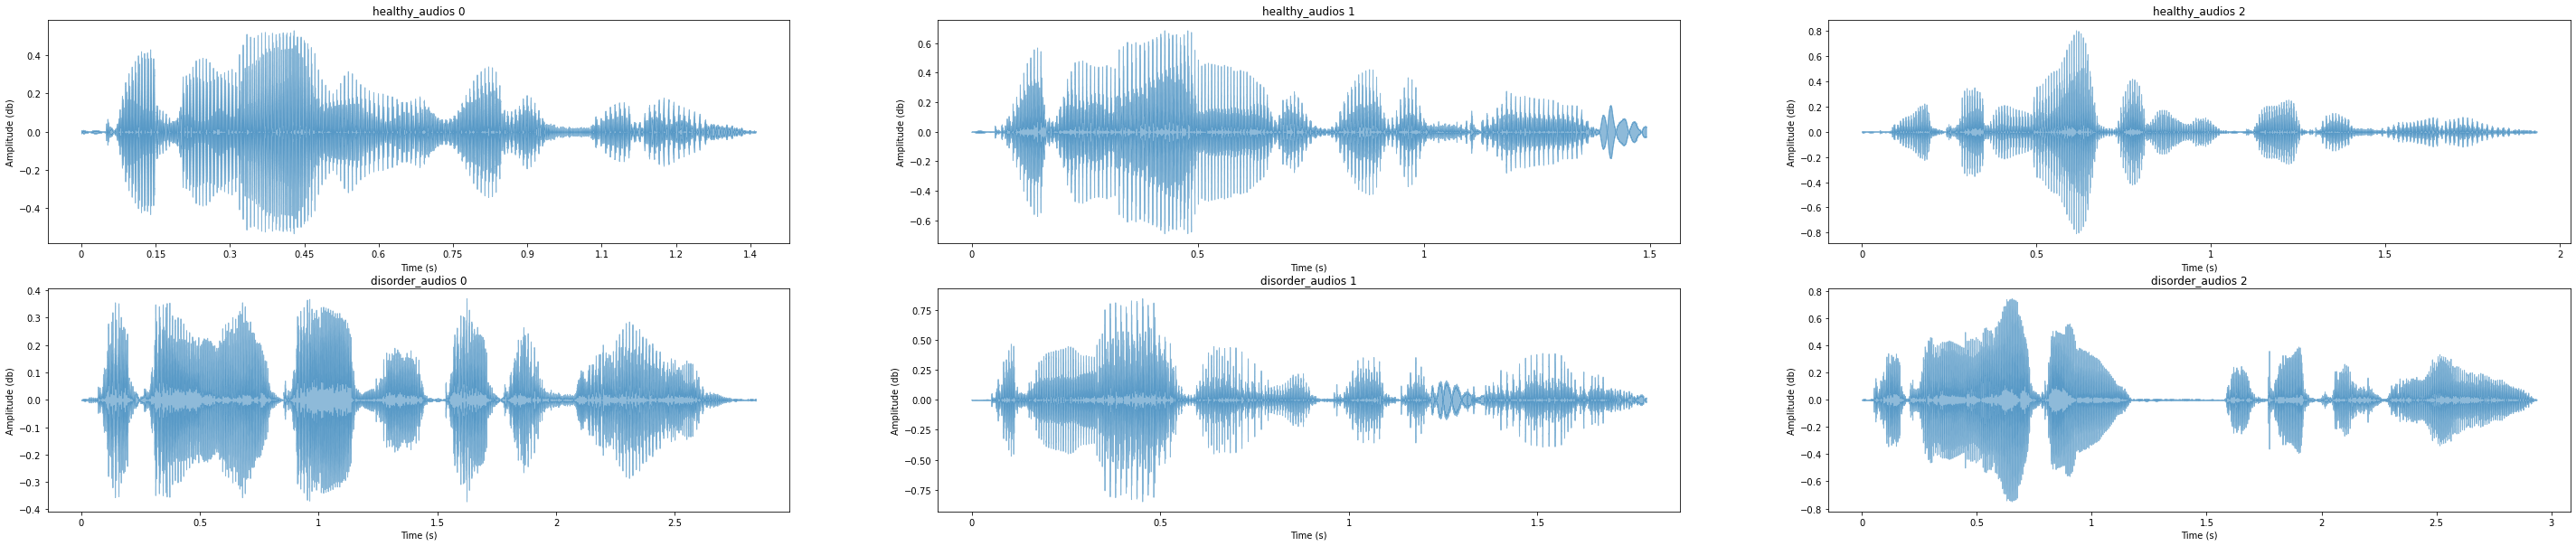

In [39]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    librosa.display.waveshow(healthy_audios[i], sr=sr, alpha=0.5)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (db)")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    librosa.display.waveshow(disorder_audios[i], sr=sr, alpha=0.5)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (db)")
    plt.title("disorder_audios "+str(i))

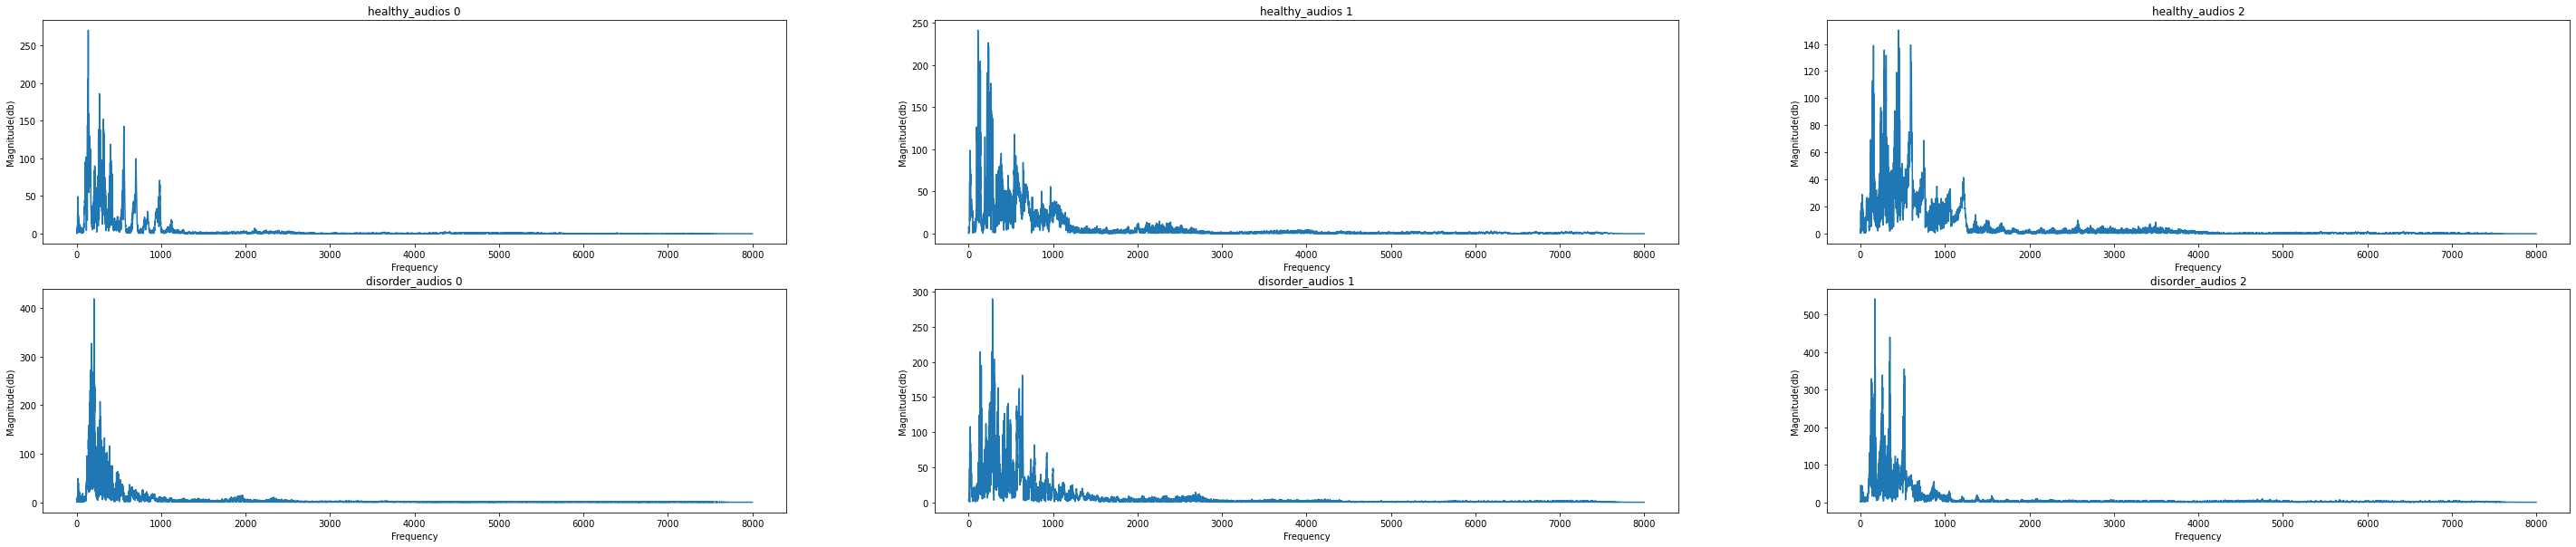

In [40]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    fft = np.fft.fft(healthy_audios[i])

    # 복소공간 값 절댓갑 취해서, magnitude 구하기
    magnitude = np.abs(fft) 

    # Frequency 값 만들기
    f = np.linspace(0,sr,len(magnitude))

    # 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
    #left_spectrum = magnitude
    #left_f=f
    left_spectrum = magnitude[:int(len(magnitude)/2)]
    left_f = f[:int(len(magnitude)/2)]

    plt.plot(left_f, left_spectrum)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude(db)")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    fft = np.fft.fft(disorder_audios[i])

    # 복소공간 값 절댓갑 취해서, magnitude 구하기
    magnitude = np.abs(fft) 

    # Frequency 값 만들기
    f = np.linspace(0,sr,len(magnitude))

    # 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
    #left_spectrum = magnitude
    #left_f=f
    left_spectrum = magnitude[:int(len(magnitude)/2)]
    left_f = f[:int(len(magnitude)/2)]

    plt.plot(left_f, left_spectrum)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude(db)")
    plt.title("disorder_audios "+str(i))

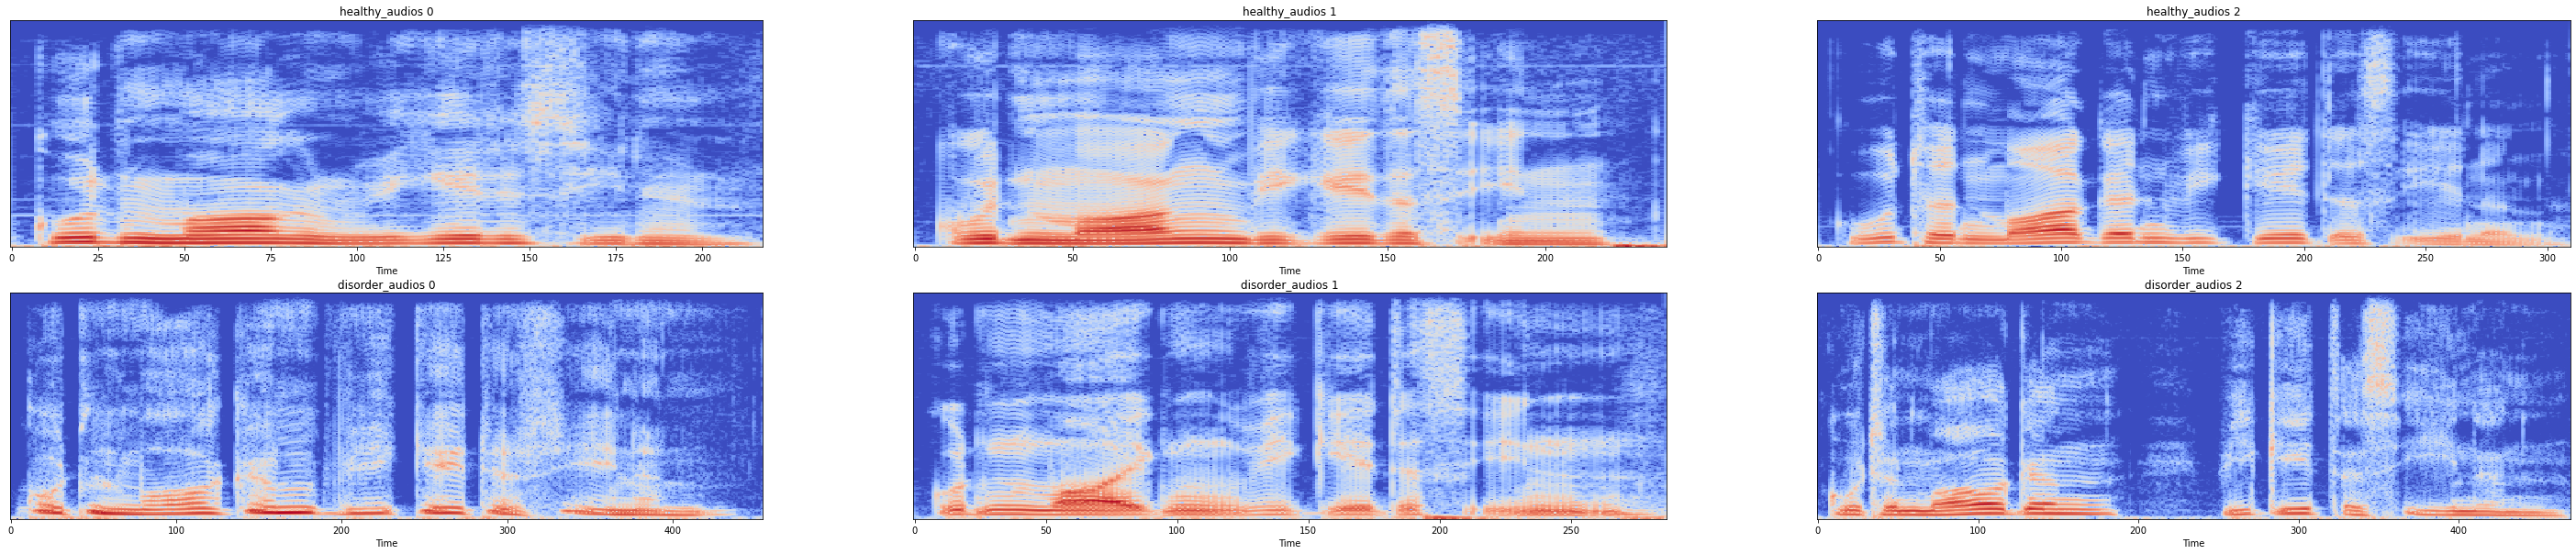

In [41]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(healthy_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(disorder_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("disorder_audios "+str(i))

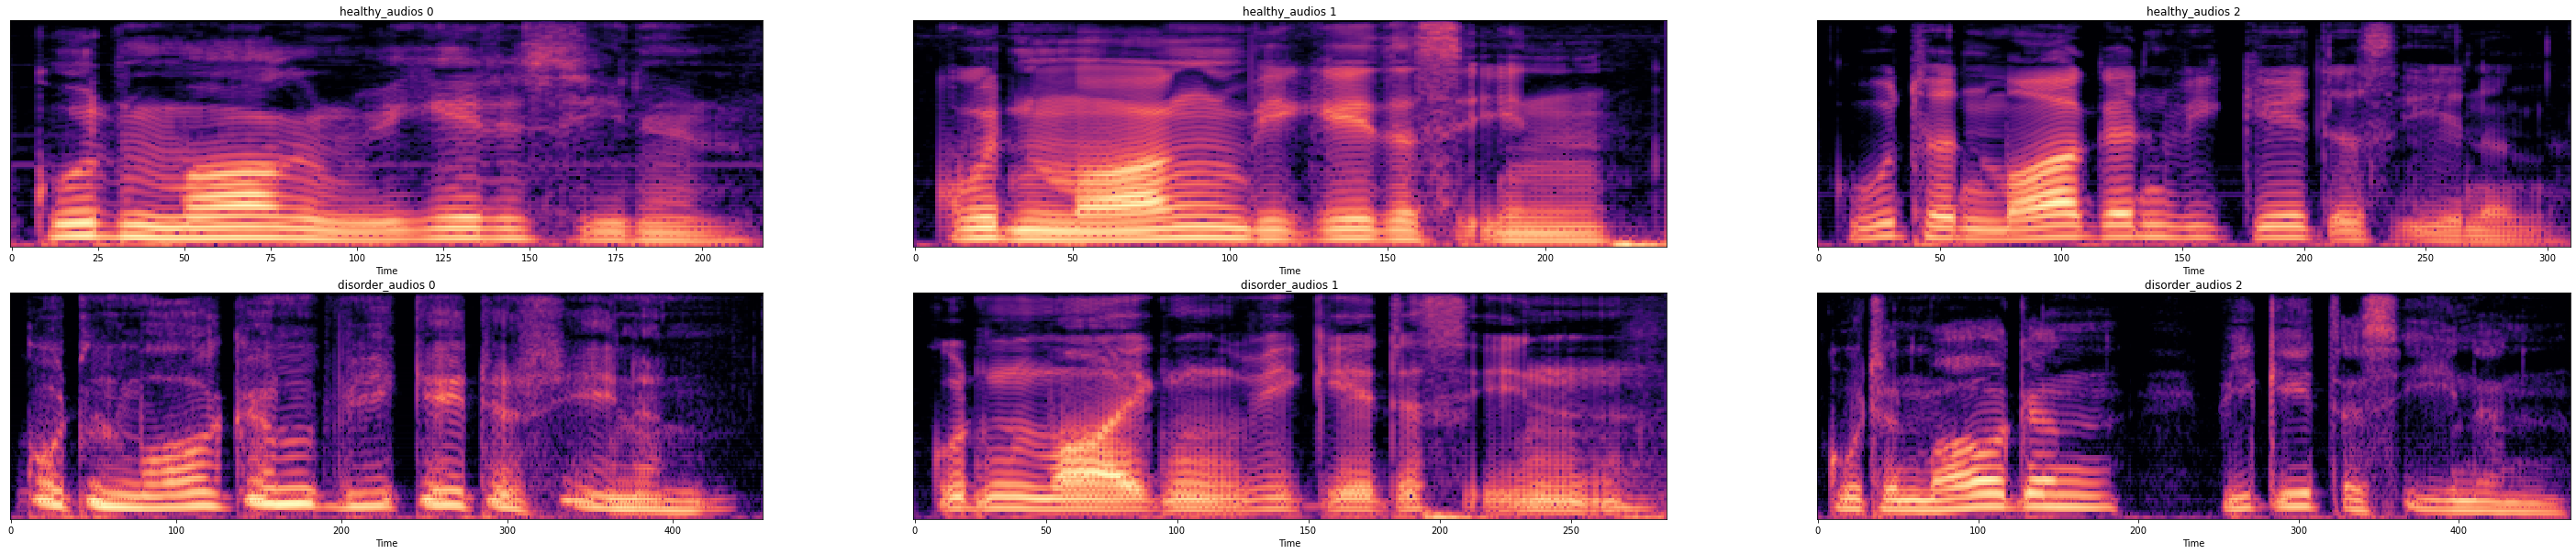

In [18]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    sr=16000
    win_length =  np.int64(16000/40) #
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(healthy_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(disorder_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("disorder_audios "+str(i))

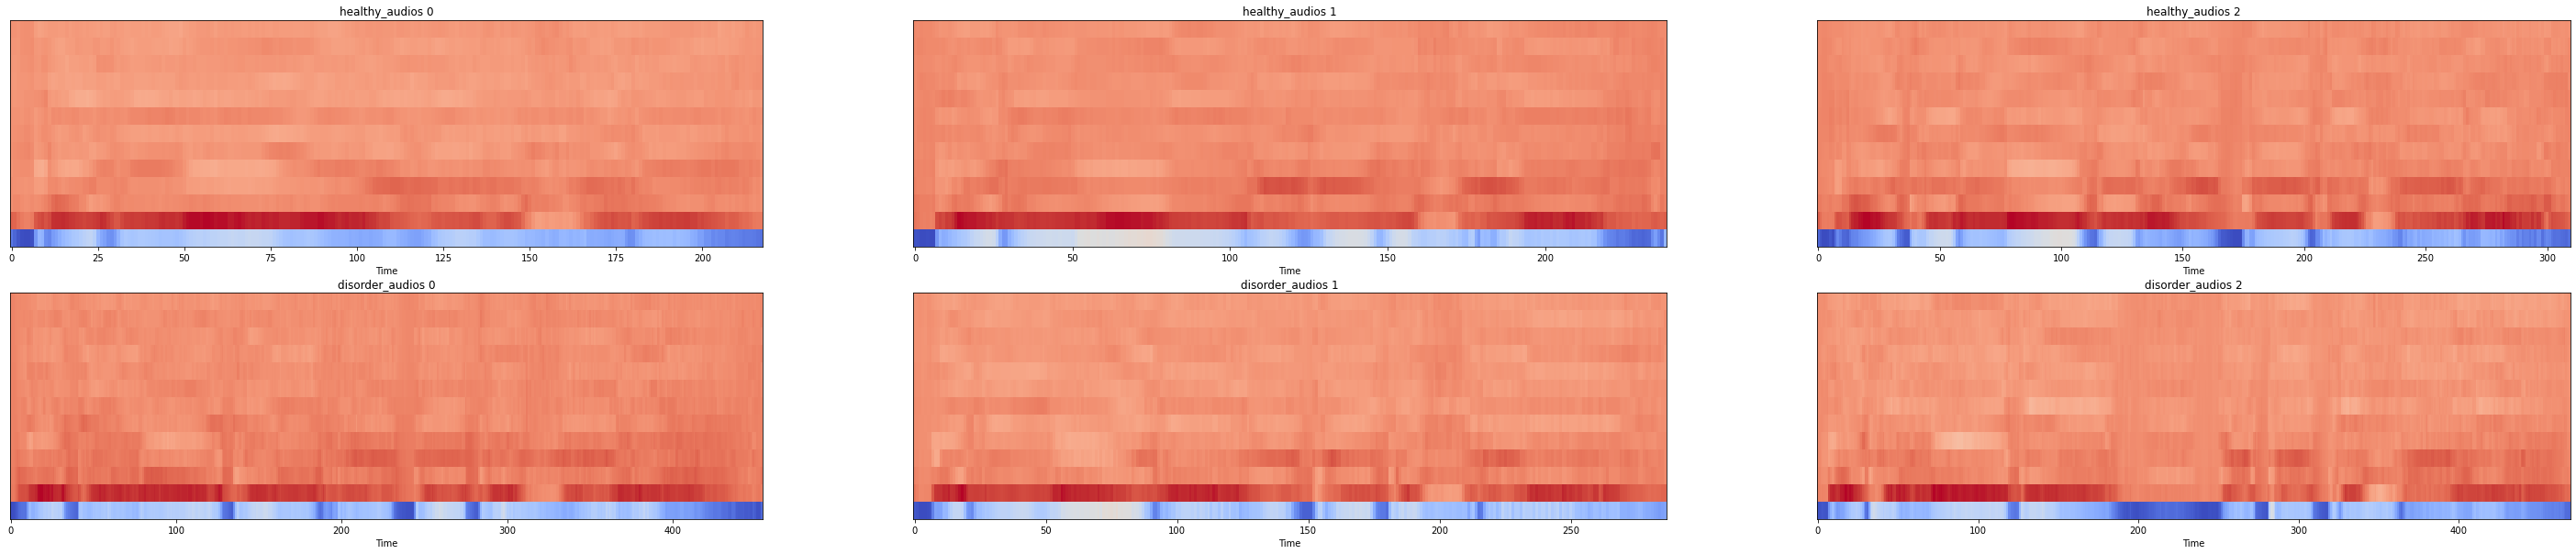

In [43]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    MFCCs = librosa.feature.mfcc(y=healthy_audios[i], sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

    librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    MFCCs = librosa.feature.mfcc(y=disorder_audios[i], sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

    librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("disorder_audios "+str(i))

In [4]:
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
import torchvision.models as models
import torchaudio
import torchaudio.transforms as T
import librosa
import numpy as np

In [155]:
win_length =  np.int64(16000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 w

mel_scale = T.MelSpectrogram(
            sample_rate=16000,
            n_fft=win_length,
            win_length=win_length,
            hop_length=hop_length,
            n_mels=128,
            center=True,
            pad_mode="constant",
            power=2.0,
            f_max=8000,
            norm="slaney",
            mel_scale="slaney",
            window_fn=torch.hann_window
    )

# mel_scale = T.MelSpectrogram(
#             sample_rate=16000,
#             n_fft=win_length,
#             win_length=win_length,
#             hop_length=hop_length,
#             n_mels=128,
#             center=True,
#             pad_mode="constant",
#             power=2.0,
#             norm="slaney",
#             mel_scale="slaney",
#             window_fn=torch.hann_window
#     )
# mel_scale = T.MelSpectrogram(
#             sample_rate=16000,
#             n_fft=1024,
#             win_length=1024,
#             hop_length=512,
#             n_mels=128,
#             power=2.,
#     )


power_to_db = T.AmplitudeToDB(stype="power")

c:\Users\USER\anaconda4\envs\local_torch\lib\site-packages\torchaudio\functional\functional.py:594: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Text(0.5, 1.0, 'healthy_audios 0')

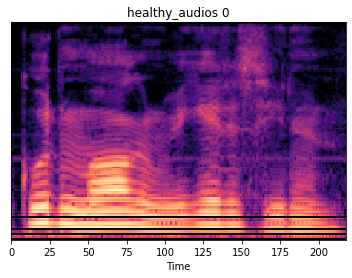

In [156]:
sig=torch.from_numpy(healthy_audios[0]).type(torch.float32)# 타입 변화
sig_mel=mel_scale(sig)
#sig_mel=power_to_db(sig_mel)
sig_mel=torchaudio.functional.amplitude_to_DB(sig_mel,amin=1e-10,top_db=80,multiplier=10,db_multiplier=torch.log10(max( [torch.max(sig_mel),1e-10] ) ) )
sig_mel=sig_mel.cpu().numpy()
#sig_mel=librosa.core.power_to_db(sig_mel,ref=np.max)

librosa.display.specshow(sig_mel, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("healthy_audios "+str(0))

Text(0.5, 1.0, 'healthy_audios 0')

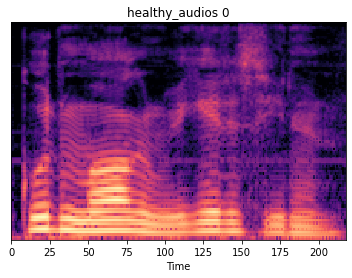

In [146]:
sig=torch.from_numpy(healthy_audios[0]).type(torch.float32)# 타입 변화
sig_mel=mel_scale(sig)
#sig_mel=power_to_db(sig_mel)
sig_mel=torchaudio.functional.amplitude_to_DB(sig_mel,amin=1e-10,top_db=80,multiplier=10,db_multiplier=torch.log10(torch.max(sig_mel)) )
sig_mel=sig_mel.cpu().numpy()
#sig_mel=librosa.core.power_to_db(sig_mel,ref=np.max)

librosa.display.specshow(sig_mel, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("healthy_audios "+str(0))

In [133]:
np.max(sig_mel)

0.0

In [158]:
np.square(np.subtract(sig_mel,S)).mean()

2.4412825e-09

In [107]:
(sig_mel-S).sum()

-0.07432032

c:\Users\USER\anaconda4\envs\local_torch\lib\site-packages\librosa\feature\spectral.py:2041: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Text(0.5, 1.0, 'healthy_audios 0')

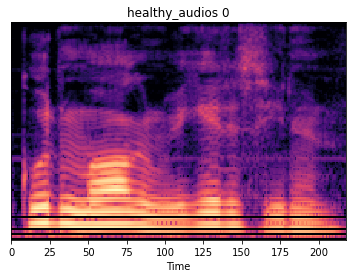

In [157]:
i=0
sr=16000
win_length =  np.int64(16000/40) #
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

S = librosa.feature.melspectrogram(y = healthy_audios[i],
                                            sr=sr,
                                            # hyp param
                                            n_mels = 128,
                                            n_fft =win_length,
                                            win_length = win_length,
                                            hop_length = hop_length,
                                            fmax = 8000,
                                            )
S = librosa.core.power_to_db(S,ref=np.max)

librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("healthy_audios "+str(i))

Text(0.5, 1.0, 'healthy_audios 0')

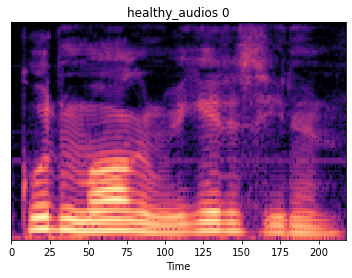

In [19]:
i=0
sr=16000
win_length =  np.int64(16000/40) #
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

stft = librosa.stft(healthy_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


#D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
S = librosa.core.power_to_db(S,ref=np.max)

librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("healthy_audios "+str(i))

In [52]:
S.min()

-80.0

In [53]:
S.max()

-9.536743e-07

In [54]:
sig_mel.min()

-80.0